<a href="https://colab.research.google.com/github/JasmineHuang25/Rock_Scissors_Paper_Gmae/blob/main/Copy_of_reload_and_webapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow import keras

import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns

import os
import cv2
from keras.preprocessing import image
from keras import utils

# Call the saved model

In [3]:
model = keras.models.load_model('/content/gdrive/MyDrive/rock_paper_scissors/MVP/rsp_best_model.h5')

## Testing and validation

1/1 [==============================] - 0s 71ms/step
Rock


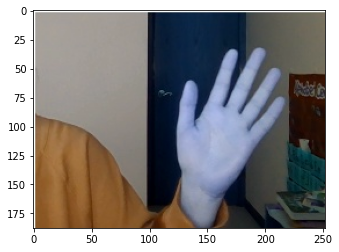

In [27]:
path = "/content/gdrive/MyDrive/Image/other_image/6.png"

cv_img = cv2.imread(path)

img = utils.load_img(path, target_size=(150, 150))
x = utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

for i in classes:
    if i[0] == 1:
        print("paper")
    elif i[1] == 1:
        print("Rock")
    else:
        print("Scissor")
        
plt.imshow(cv_img)

# PLAYGOUND!!

In [6]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from rembg import remove

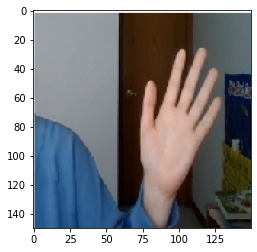

In [26]:
path = "/content/gdrive/MyDrive/Image/other_image/6.png"

img = utils.load_img(path, target_size=(150, 150))
plt.imshow(img)


# output = remove(img)
# plt.imshow(output)

# input_arr = utils.img_to_array(output)
# input_arr.shape

# x = np.expand_dims(input_arr, axis=0)
# x.shape

# images = np.vstack([x])
# images.shape

# input_arr = x.reshape((1, 150, 150, 3))

# classes = model.predict(images, batch_size=1)

# for i in classes:
#     if i[0] == 1:
#         print("paper")
#     elif i[1] == 1:
#         print("Rock")
#     else:
#         print("Scissor")



# END Of PLAYGOUND!!!

# Web App deployment using Gradio

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

## Insert image version

In [ ]:
def classify_image(inp):

  inp = inp.reshape((1, 150, 150, 3))  
  prediction = model.predict(inp, batch_size=10)

  for i in prediction:
    if i[0] == 1:
      label = "Paper"
    elif i[1] == 1:
      label = "Rock"
    else:
      label = "Scissors"
  
  # Being in Rock-Scissors-Paper game
  choices = ['Rock', 'Paper', 'Scissors']
  user_move = label
  computer_move = random.choice(choices)
  guess_dict = {'Rock': 0, 'Paper': 1, 'Scissors':2}
  guess_idx = guess_dict.get(user_move, 3)
  computer_idx = guess_dict.get(computer_move)
  result_matrix = [[0,2,1], [1,0,2], [2,1,0]]
  result_idx = result_matrix[guess_idx][computer_idx]
  result_messages = ['It is a tie', 'You win!!! Congrats!', 'Sorry, you lose :(']
  result = result_messages[result_idx]
  output_text = f"The model recognizes your move is {user_move}.\nComputer's move is {computer_move}.\n{result}"

  if computer_move == 'Rock':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/rock.jpg'
    computer_move_img = utils.load_img(img_path, target_size=(150, 150))
  elif computer_move == 'Paper':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/paper.jpg'
    computer_move_img = utils.load_img(img_path, target_size=(150, 150))
  else:
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/scissors.jpg'
    computer_move_img = utils.load_img(img_path, target_size=(150, 150))

  return computer_move_img, output_text

output1 = gr.Image(shape=(150,150), label="Computer's Move")


gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(150, 150), label='Insert your move/image here'),
             outputs=[output1, 'text'],
             title="Rock-Scissors-Paper Image Game with Computer",
             live=False,
             examples=['/content/gdrive/MyDrive/rock_paper_scissors/MVP/Dataset/validation/rock/rock3.png',
                       '/content/gdrive/MyDrive/rock_paper_scissors/MVP/Dataset/validation/scissors/scissors4.png',
                       '/content/gdrive/MyDrive/rock_paper_scissors/MVP/Dataset/validation/paper/paper2.png']
             ).launch(debug=True, share=False)



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 103ms/step
Keyboard interruption in main thread... closing server.


## Webcam version

In [ ]:
def webcam(inp):

  cap_img = inp.reshape((-1, 150, 150, 3))  
  prediction = model.predict(cap_img, batch_size=1)

  for i in prediction:
    if i[0] == 1:
      label = "Paper"
    elif i[1] == 1:
      label = "Rock"
    else:
      label = "Scissors"
  
  # Being in Rock-Scissors-Paper game
  choices = ['Rock', 'Paper', 'Scissors']
  user_move = label
  computer_move = random.choice(choices)
  guess_dict = {'Rock': 0, 'Paper': 1, 'Scissors':2}
  guess_idx = guess_dict.get(user_move, 3)
  computer_idx = guess_dict.get(computer_move)
  result_matrix = [[0,2,1], [1,0,2], [2,1,0]]
  result_idx = result_matrix[guess_idx][computer_idx]
  result_messages = ['It is a tie', 'You win!!! Congrats!', 'Sorry, you lose :(']
  result = result_messages[result_idx]
  output_text = f"The model recognizes your move is {user_move}.\nComputer's move is {computer_move}.\n{result}"
  
  if computer_move == 'Rock':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/computer_move_rock.jpg'
    computer_move_img = utils.load_img(img_path, target_size=(150, 150))
  elif computer_move == 'Paper':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/computer_move_paper.jpg'
    computer_move_img = utils.load_img(img_path, target_size=(150, 150))
  else:
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/computer_move_scissors.jpg'
    computer_move_img = utils.load_img(img_path, target_size=(150, 150))

  return computer_move_img, output_text


interface = gr.Interface(fn=webcam, 
             inputs=gr.Image(shape=(150, 150),
                             source='webcam',
                             streaming=True,
                             mirror_webcam=False),
             outputs=['image', 'text'],
             title="Rock-Scissors-Paper Image Game with Computer",
             live=False)

interface.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
